In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [2]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [3]:
init_notebook_mode(connected=True)

In [5]:
df=pd.read_csv(r'C:\Users\abina\Downloads/hotel_bookings.csv')

## Data cleaning and understanding : ETL

In [6]:
df.shape

(119390, 32)

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [10]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
##Null values
##Option we have:
## dropNa
## fillna:  sum,mean.median: imputation
##interpolation

In [9]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
df['agent'].head().notnull()

0    False
1    False
2    False
3     True
4     True
Name: agent, dtype: bool

In [27]:
df['agent'][df['agent'].notnull()].head()

3    304.0
4    240.0
5    240.0
7    303.0
8    240.0
Name: agent, dtype: float64

In [28]:
df['agent'].isna().sum()

16340

In [29]:
## We will impute agent column with mean values here 

In [44]:
df['agent']=df['agent'].fillna(df['agent'].median())

In [48]:
df['agent'].head(40)

0      14.0
1      14.0
2      14.0
3     304.0
4     240.0
5     240.0
6      14.0
7     303.0
8     240.0
9      15.0
10    240.0
11    240.0
12    240.0
13    241.0
14    241.0
15    240.0
16      8.0
17    240.0
18     14.0
19    250.0
20    241.0
21    250.0
22    250.0
23    250.0
24    115.0
25      5.0
26      8.0
27    240.0
28    240.0
29    240.0
30     14.0
31    241.0
32     14.0
33    175.0
34    241.0
35    241.0
36    240.0
37    241.0
38    241.0
39    250.0
Name: agent, dtype: float64

In [35]:
df['agent'].max()

535.0

In [36]:
df['agent'].min()

1.0

In [42]:
df['agent'].mean()

76.74439232766564

In [49]:
df['company'].dtypes

dtype('float64')

In [51]:
df['company'][df['company'].notnull()]

18        110.0
218       110.0
219       110.0
220       110.0
295       113.0
          ...  
119119    451.0
119122    451.0
119123    451.0
119124     72.0
119248    485.0
Name: company, Length: 6797, dtype: float64

In [53]:
df['company'].dropna(inplace=True)

In [54]:
df.dropna(inplace=True)

In [55]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,14.0,110.0,0,Transient,107.42,0,0,Check-Out,7/2/2015
218,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,110.0,0,Transient,104.72,0,1,Canceled,7/8/2015
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,110.0,0,Transient,104.72,0,1,Canceled,7/8/2015
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,0.0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,14.0,110.0,0,Transient,104.72,1,1,Check-Out,7/10/2015
295,Resort Hotel,0,84,2015,July,28,11,1,1,2,0.0,0,HB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,113.0,0,Transient,100.00,1,0,Check-Out,7/13/2015


In [56]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [57]:
##handling duplicate values

In [62]:
df.duplicated().sum()

1531

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## PS: Chllenge is to remove irrelevant rows

In [68]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [72]:
df['adults'].dtypes

dtype('int64')

In [73]:
df['children'].dtypes

dtype('float64')

In [74]:
df['babies'].dtypes

dtype('int64')

In [76]:
filter=(df['adults']==0) & (df['children']==0) & (df['babies']==0)

In [79]:
df1=df[~filter]

In [80]:
##Perform descriptive analysss

In [81]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,5075.0,0.109754,0.312613,0.0,0.0,0.0,0.0,1.0
lead_time,5075.0,39.678030,78.596210,0.0,2.0,7.0,27.0,365.0
arrival_date_year,5075.0,2016.166700,0.689892,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,5075.0,26.319212,15.265195,1.0,13.0,23.0,42.0,53.0
arrival_date_day_of_month,5075.0,15.585419,8.627647,1.0,8.0,15.0,22.0,31.0
stays_in_weekend_nights,5075.0,0.522365,0.806239,0.0,0.0,0.0,1.0,9.0
stays_in_week_nights,5075.0,1.782463,1.679823,0.0,1.0,1.0,2.0,25.0
adults,5075.0,1.278030,0.474560,0.0,1.0,1.0,2.0,4.0
children,5075.0,0.020296,0.180280,0.0,0.0,0.0,0.0,3.0
babies,5075.0,0.003547,0.059455,0.0,0.0,0.0,0.0,1.0


In [86]:
df[['lead_time','total_of_special_requests','adr']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,5092.0,39.617243,78.526612,0.0,2.0,7.0,27.0,365.0
total_of_special_requests,5092.0,0.312255,0.649481,0.0,0.0,0.0,0.0,4.0
adr,5092.0,66.814319,35.476045,0.0,42.0,65.0,88.0,315.0


In [87]:
##Tob find out quantile

In [95]:
np.quantile(df['lead_time'],0.99)

364.0

In [1]:
##Challenge is to calculate quantile value b/w 90 to 100 for three columns namely lead_time','total_of_special_requests','adr'
####We will use for lopp and np quantile for this

In [114]:
for col in ['lead_time','total_of_special_requests','adr']:
    print('feature name:{}'.format(col))
    print('\n')
        
    for i in range (90,101,1):
        quantile=np.quantile(df1[col],q=i/100).round(2)
        print('{} quantile value is {}'.format(i,quantile))
        print('\n')

feature name:lead_time


90 quantile value is 154.0


91 quantile value is 169.0


92 quantile value is 201.08


93 quantile value is 214.0


94 quantile value is 215.0


95 quantile value is 224.0


96 quantile value is 261.04


97 quantile value is 287.0


98 quantile value is 336.0


99 quantile value is 364.0


100 quantile value is 365.0


feature name:total_of_special_requests


90 quantile value is 1.0


91 quantile value is 1.0


92 quantile value is 1.0


93 quantile value is 1.0


94 quantile value is 2.0


95 quantile value is 2.0


96 quantile value is 2.0


97 quantile value is 2.0


98 quantile value is 2.0


99 quantile value is 3.0


100 quantile value is 4.0


feature name:adr


90 quantile value is 110.0


91 quantile value is 110.0


92 quantile value is 111.02


93 quantile value is 117.98


94 quantile value is 120.0


95 quantile value is 126.0


96 quantile value is 130.5


97 quantile value is 136.0


98 quantile value is 144.0


99 quantile value is 169.0


100

## Ps To perform spatial analysis: To find out where do guests come from

In [115]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [117]:
not_cancelled=df1[df1['is_canceled']==0]

In [118]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           4518 non-null   object 
 1   is_canceled                     4518 non-null   int64  
 2   lead_time                       4518 non-null   int64  
 3   arrival_date_year               4518 non-null   int64  
 4   arrival_date_month              4518 non-null   object 
 5   arrival_date_week_number        4518 non-null   int64  
 6   arrival_date_day_of_month       4518 non-null   int64  
 7   stays_in_weekend_nights         4518 non-null   int64  
 8   stays_in_week_nights            4518 non-null   int64  
 9   adults                          4518 non-null   int64  
 10  children                        4518 non-null   float64
 11  babies                          4518 non-null   int64  
 12  meal                           

In [119]:
not_cancelled['country'].value_counts().reset_index()

,index,country
0,PRT,3023
1,GBR,500
2,ESP,164
3,FRA,149
4,ITA,85
...,...,...
59,ISL,1
60,BGR,1
61,ZAF,1
62,CRI,1


In [120]:
country_wise=not_cancelled['country'].value_counts().reset_index()

In [122]:
country_wise

,index,country
0,PRT,3023
1,GBR,500
2,ESP,164
3,FRA,149
4,ITA,85
...,...,...
59,ISL,1
60,BGR,1
61,ZAF,1
62,CRI,1


In [126]:
country_wise.columns=['country','no_of_guests']

In [127]:
country_wise.head()

,country,no_of_guests
0,PRT,3023
1,GBR,500
2,ESP,164
3,FRA,149
4,ITA,85


In [2]:
###To create choroplate map using plotly

In [139]:
country_wise.columns

Index(['country', 'no_of_guests'], dtype='object')

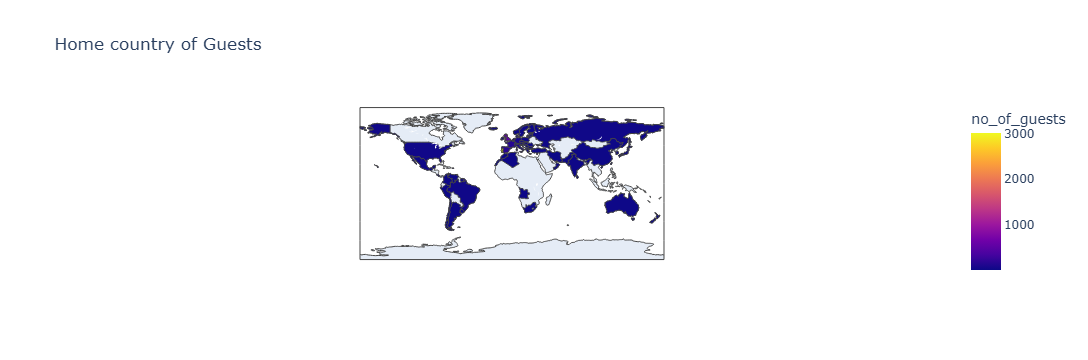

In [144]:
px.choropleth(country_wise,locations='country',color='no_of_guests',hover_name=country_wise['country'],title='Home country of Guests')

In [153]:
##PS: IS there any diff b/w assigned and reserved room types

In [154]:
not_cancelled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [156]:
not_cancelled['reserved_room_type'].dtypes

dtype('O')

In [157]:
not_cancelled['assigned_room_type'].dtypes

dtype('O')

In [158]:
pd.crosstab(index=not_cancelled['reserved_room_type'],columns=not_cancelled['assigned_room_type'],margins=True)

assigned_room_type,A,B,C,D,E,F,G,H,I,K,All
reserved_room_type,,,,,,,,,,,
A,2594,74,147,763,184,71,30,21,37,11,3932
B,2,7,0,0,0,0,0,0,0,0,9
C,1,0,17,0,1,0,0,2,0,0,21
D,19,4,2,279,28,15,3,0,2,0,352
E,1,0,1,1,117,18,6,0,2,1,147
F,2,0,0,2,0,14,1,0,0,0,19
G,0,0,1,0,1,2,30,0,0,0,34
H,0,0,0,0,0,0,0,4,0,0,4
All,2619,85,168,1045,331,120,70,27,41,12,4518


In [161]:
## wie will normalize it
pd.crosstab(index=not_cancelled['reserved_room_type'],columns=not_cancelled['assigned_room_type'],margins=True,normalize='index')

assigned_room_type,A,B,C,D,E,F,G,H,I,K
reserved_room_type,,,,,,,,,,
A,0.659715,0.018820,0.037386,0.194049,0.046796,0.018057,0.007630,0.005341,0.009410,0.002798
B,0.222222,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.047619,0.000000,0.809524,0.000000,0.047619,0.000000,0.000000,0.095238,0.000000,0.000000
D,0.053977,0.011364,0.005682,0.792614,0.079545,0.042614,0.008523,0.000000,0.005682,0.000000
E,0.006803,0.000000,0.006803,0.006803,0.795918,0.122449,0.040816,0.000000,0.013605,0.006803
F,0.105263,0.000000,0.000000,0.105263,0.000000,0.736842,0.052632,0.000000,0.000000,0.000000
G,0.000000,0.000000,0.029412,0.000000,0.029412,0.058824,0.882353,0.000000,0.000000,0.000000
H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
All,0.579681,0.018814,0.037185,0.231297,0.073263,0.026560,0.015494,0.005976,0.009075,0.002656


In [162]:
###Which market segmment has highest bookings

In [163]:
not_cancelled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [164]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           4518 non-null   object 
 1   is_canceled                     4518 non-null   int64  
 2   lead_time                       4518 non-null   int64  
 3   arrival_date_year               4518 non-null   int64  
 4   arrival_date_month              4518 non-null   object 
 5   arrival_date_week_number        4518 non-null   int64  
 6   arrival_date_day_of_month       4518 non-null   int64  
 7   stays_in_weekend_nights         4518 non-null   int64  
 8   stays_in_week_nights            4518 non-null   int64  
 9   adults                          4518 non-null   int64  
 10  children                        4518 non-null   float64
 11  babies                          4518 non-null   int64  
 12  meal                           

In [165]:
not_cancelled['market_segment'].unique()

array(['Corporate', 'Online TA', 'Groups', 'Direct', 'Offline TA/TO',
       'Complementary', 'Aviation'], dtype=object)

In [171]:
mkt_segment_count=not_cancelled['market_segment'].value_counts().reset_index()

In [174]:
not_cancelled['market_segment'].value_counts().values

array([3041,  763,  253,  162,  162,   71,   66], dtype=int64)

In [172]:
mkt_segment_count.columns=['m_segment','bookings']

In [176]:
mkt_segment_count.head()

,m_segment,bookings
0,Corporate,3041
1,Groups,763
2,Complementary,253
3,Direct,162
4,Aviation,162


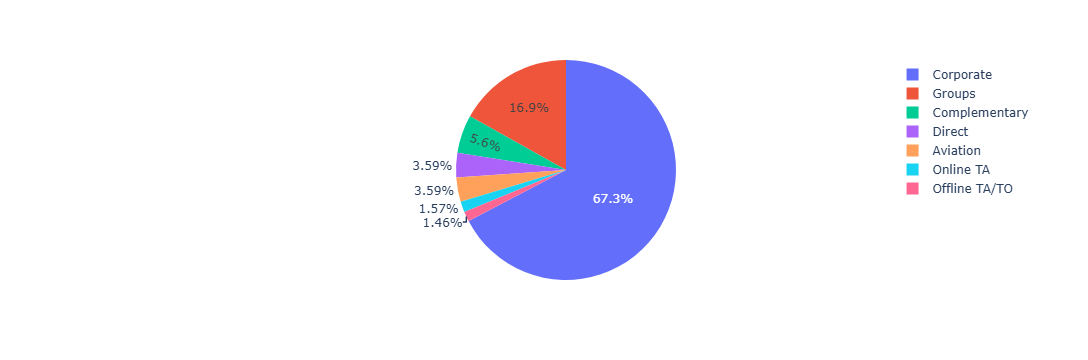

In [177]:
px.pie(mkt_segment_count,values='bookings',names='m_segment')

In [178]:
###Analyzing avg price per night(ADR) of   various room types for all market segment

In [179]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           4518 non-null   object 
 1   is_canceled                     4518 non-null   int64  
 2   lead_time                       4518 non-null   int64  
 3   arrival_date_year               4518 non-null   int64  
 4   arrival_date_month              4518 non-null   object 
 5   arrival_date_week_number        4518 non-null   int64  
 6   arrival_date_day_of_month       4518 non-null   int64  
 7   stays_in_weekend_nights         4518 non-null   int64  
 8   stays_in_week_nights            4518 non-null   int64  
 9   adults                          4518 non-null   int64  
 10  children                        4518 non-null   float64
 11  babies                          4518 non-null   int64  
 12  meal                           

C:\Users\abina\AppData\Local\Temp\ipykernel_25128\1481041983.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='market_segment', ylabel='adr'>

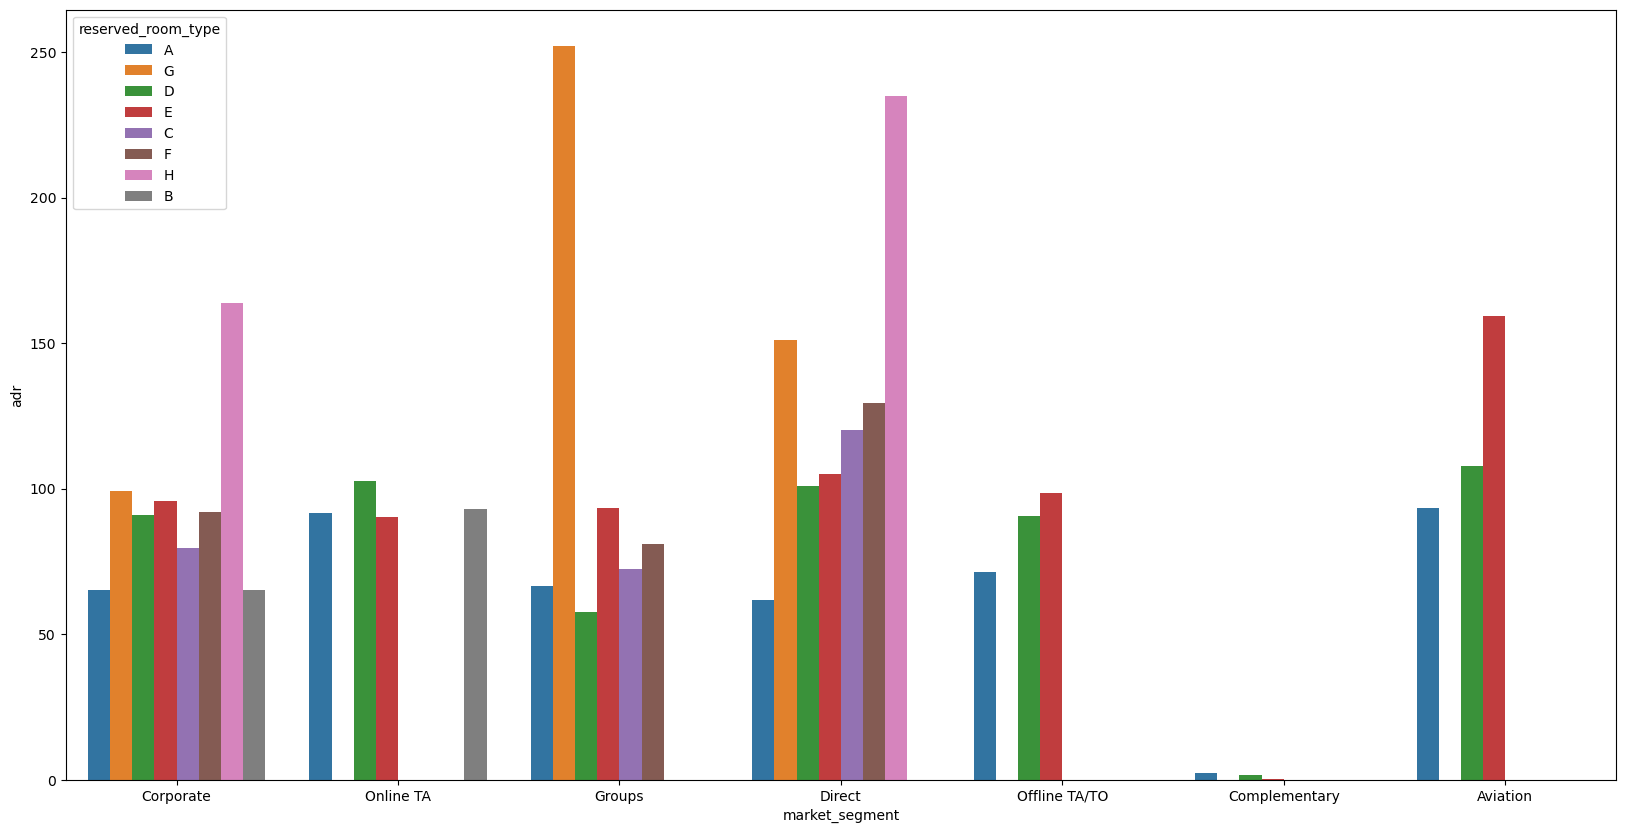

In [182]:
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment',y='adr',hue='reserved_room_type',data=not_cancelled,ci=None)

## PS : Total guests arrival on ach day

In [184]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           4518 non-null   object 
 1   is_canceled                     4518 non-null   int64  
 2   lead_time                       4518 non-null   int64  
 3   arrival_date_year               4518 non-null   int64  
 4   arrival_date_month              4518 non-null   object 
 5   arrival_date_week_number        4518 non-null   int64  
 6   arrival_date_day_of_month       4518 non-null   int64  
 7   stays_in_weekend_nights         4518 non-null   int64  
 8   stays_in_week_nights            4518 non-null   int64  
 9   adults                          4518 non-null   int64  
 10  children                        4518 non-null   float64
 11  babies                          4518 non-null   int64  
 12  meal                           

In [185]:
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,14.0,110.0,0,Transient,107.42,0,0,Check-Out,7/2/2015
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,0.0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,14.0,110.0,0,Transient,104.72,1,1,Check-Out,7/10/2015
295,Resort Hotel,0,84,2015,July,28,11,1,1,2,0.0,0,HB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,113.0,0,Transient,100.00,1,0,Check-Out,7/13/2015
387,Resort Hotel,0,1,2015,July,29,14,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,270.0,0,Transient,134.00,0,0,Check-Out,7/15/2015
541,Resort Hotel,0,0,2015,July,30,19,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,14.0,240.0,0,Group,88.20,0,0,Check-Out,7/20/2015


In [188]:
not_cancelled['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'February',
       'March', 'April', 'May', 'June', 'January', 'December'],
      dtype=object)

In [187]:
dict_month={'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'January':1,
       'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'December':12}

In [191]:
not_cancelled['arrival_date_month']=not_cancelled['arrival_date_month'].map(dict_month)

C:\Users\abina\AppData\Local\Temp\ipykernel_25128\179640521.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
not_cancelled['arrival_date_month']

18        7
220       7
295       7
387       7
541       7
         ..
119117    8
119118    8
119119    8
119124    8
119248    8
Name: arrival_date_month, Length: 4518, dtype: int64

In [193]:
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,7,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,14.0,110.0,0,Transient,107.42,0,0,Check-Out,7/2/2015
220,Resort Hotel,0,1,2015,7,28,8,0,2,2,0.0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,14.0,110.0,0,Transient,104.72,1,1,Check-Out,7/10/2015
295,Resort Hotel,0,84,2015,7,28,11,1,1,2,0.0,0,HB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,113.0,0,Transient,100.00,1,0,Check-Out,7/13/2015
387,Resort Hotel,0,1,2015,7,29,14,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,270.0,0,Transient,134.00,0,0,Check-Out,7/15/2015
541,Resort Hotel,0,0,2015,7,30,19,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,14.0,240.0,0,Group,88.20,0,0,Check-Out,7/20/2015


In [195]:
not_cancelled['Date']=not_cancelled['arrival_date_year'].astype(str)+'-'+not_cancelled['arrival_date_month'].astype(str)+'-'+not_cancelled['arrival_date_day_of_month'].astype(str)

C:\Users\abina\AppData\Local\Temp\ipykernel_25128\546761622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [196]:
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
18,Resort Hotel,0,0,2015,7,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,14.0,110.0,0,Transient,107.42,0,0,Check-Out,7/2/2015,2015-7-1
220,Resort Hotel,0,1,2015,7,28,8,0,2,2,0.0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,14.0,110.0,0,Transient,104.72,1,1,Check-Out,7/10/2015,2015-7-8
295,Resort Hotel,0,84,2015,7,28,11,1,1,2,0.0,0,HB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,113.0,0,Transient,100.00,1,0,Check-Out,7/13/2015,2015-7-11
387,Resort Hotel,0,1,2015,7,29,14,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,270.0,0,Transient,134.00,0,0,Check-Out,7/15/2015,2015-7-14
541,Resort Hotel,0,0,2015,7,30,19,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,14.0,240.0,0,Group,88.20,0,0,Check-Out,7/20/2015,2015-7-19


In [197]:
not_cancelled['Tg']=not_cancelled['adults']+not_cancelled['children']+not_cancelled['babies']

C:\Users\abina\AppData\Local\Temp\ipykernel_25128\4275711846.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
not_cancelled['Tg']

18        2.0
220       2.0
295       2.0
387       1.0
541       2.0
         ... 
119117    1.0
119118    1.0
119119    1.0
119124    1.0
119248    1.0
Name: Tg, Length: 4518, dtype: float64

In [203]:
guest=not_cancelled.groupby(['Date'])['Tg'].sum()

In [204]:
type(guest)

pandas.core.series.Series

<Axes: xlabel='Date'>

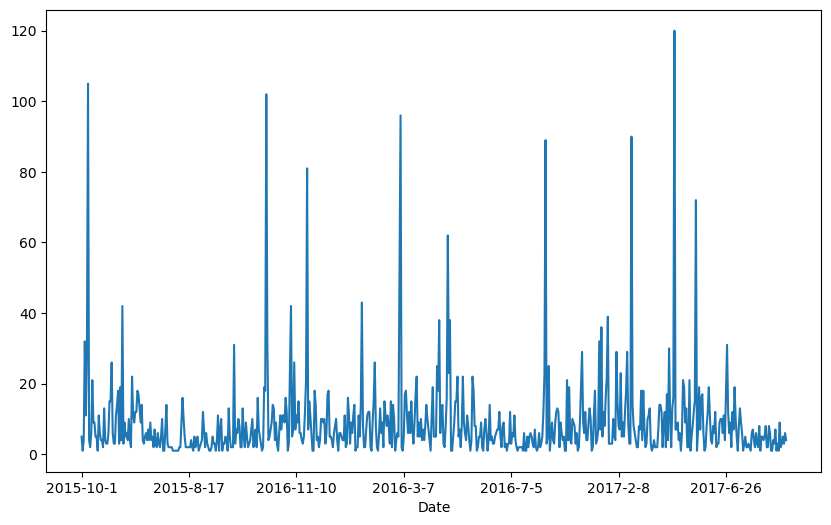

In [207]:
guest.plot(figsize=(10,6))

In [208]:
##Analyzing distribution of guest arrival

In [211]:
guest.values

array([  5.,   1.,   4.,  32.,  11.,  30., 105.,   4.,   2.,   6.,  21.,
         9.,   9.,   5.,   5.,   1.,  11.,   6.,   4.,   4.,   2.,  13.,
         4.,   3.,   3.,   6.,  15.,  15.,  26.,   6.,   3.,   3.,  11.,
        14.,  18.,   3.,  19.,   4.,  42.,   3.,   9.,   5.,   6.,   4.,
        10.,   4.,   2.,  22.,  11.,   9.,  12.,  12.,  18.,  17.,  13.,
         9.,  14.,   4.,   3.,   5.,   6.,   4.,   7.,   4.,   9.,   4.,
         5.,   2.,   7.,   3.,   2.,   6.,   3.,   2.,   5.,  10.,   1.,
         1.,   7.,  14.,   3.,   2.,   2.,   2.,   2.,   1.,   1.,   1.,
         1.,   1.,   1.,   2.,   2.,   9.,  16.,  10.,   5.,   2.,   2.,
         2.,   2.,   2.,   4.,   2.,   1.,   5.,   2.,   4.,   5.,   1.,
         2.,   3.,   4.,  12.,   7.,   2.,   6.,   3.,   2.,   1.,   1.,
         2.,   5.,   3.,   3.,   1.,   4.,  11.,   1.,   7.,  10.,   1.,
         3.,   3.,   5.,   4.,   1.,  13.,   5.,   2.,   2.,   2.,  31.,
         3.,   7.,   6.,  10.,   8.,   2.,   2.,  1

C:\Users\abina\AppData\Local\Temp\ipykernel_25128\2161124021.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

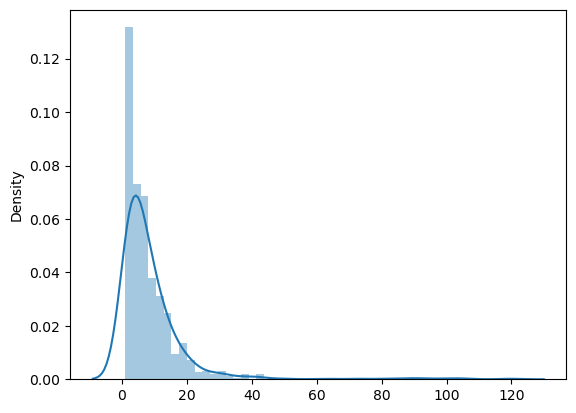

In [210]:
sns.distplot(guest.values)

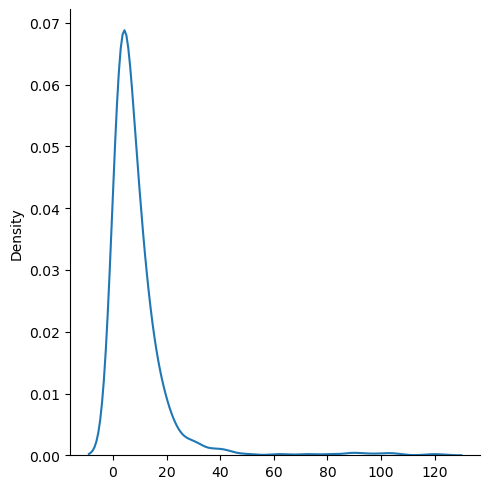

In [214]:
sns.displot(guest.values,kind='kde')

<Figure size 2000x1000 with 0 Axes>

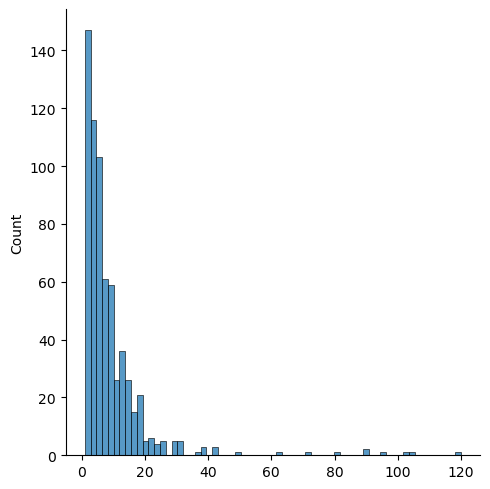

In [216]:
plt.figure(figsize=(20,10))
sns.displot(guest.values)